In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from scipy.spatial import distance
import matplotlib.pyplot as plt
ep=10
import math
import itertools

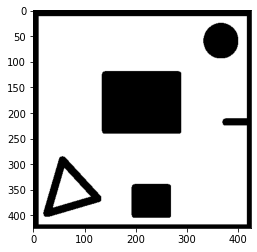

In [18]:
#assuming the robot is circular in shape
def configspace(img,L):
    circle=np.zeros([2*L+2,2*L+2,3],dtype=np.uint8)
    circle=cv2.circle(circle,(L,L), L+1, (255,255,255), -1)
    struct_element=cv2.cvtColor(circle, cv2.COLOR_BGR2GRAY)
    struct_element[struct_element>0]=1
    closing = cv2.morphologyEx(img, cv2.MORPH_OPEN, struct_element)
    dilation = cv2.erode(img,struct_element,iterations = 1)
    return dilation

img=cv2.imread("/content/sq_maze.png")
# plt.imshow(img.astype(np.uint8))
dilate=configspace(img, 5)
plt.imshow((dilate).astype(np.uint8))

In [3]:
def dfs(cur,des,path):
    global gra
    global vis
    global opt
    path.append(cur)
    if cur == des:
#         print(path)
        opt = path.copy()
        return path
    vis[cur] = 1
    if len(gra[cur]) > 0:
        for pt in gra[cur]:
            if (vis[pt]).all() == 0:
                dfs(pt,des,path)       
    path.pop()

In [16]:
def rrt_nonholon(img, t1, t2):
    init_theta=0
    del_t=1
    path=[]
    global gra
    global vis
    global opt
    gra = {(x,y) : [] for x in range(img.shape[0]) for y in range(img.shape[1])}
    vis = {(x,y) : 0 for x in range(img.shape[0]) for y in range(img.shape[1])}
    for i in range(2000):
        available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
        qRand = available[np.random.randint(0,len(available))]
        calc = distance.cdist(t1,[qRand])
        qNear = t1[np.argmin(calc)]

        v, w = [5, 10], [-math.pi/15, 0, math.pi/15]
        controls = list(itertools.product(v, w))
        max_dist = np.inf
        theta = 0
        qNew=[0,0]

        for crtl in controls:
            v1, w1 = crtl
            temp = [qNear[0] + v1*del_t*math.cos(init_theta + w1*del_t) , qNear[1] + v1*del_t*math.sin(init_theta + w1*del_t)]
            dist = np.linalg.norm(np.array(qRand)-np.array(temp))
            if dist < max_dist:
                qNew = temp
                theta = (init_theta + w1*del_t)
                max_dist = dist
        init_theta=theta
        qNew = np.asarray(qNew,dtype=np.int64)

        if(i%100==0):
            print("i",i)
        if(qNew[0]<0 or qNew[0]>img.shape[1] or qNew[1]<0 or qNew[1]>img.shape[0]):
            continue

        imgcpy = img.copy()
        prevobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        cv2.line(imgcpy,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))

        newobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        if prevobs == newobs:
            cv2.line(img,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
            path.append([qNear[0],qNear[1],qNew[0],qNew[1]])
            t1 = np.vstack([t1,qNew])
#         plt.figure()
        plt.imshow(img.astype(np.uint8))
        if np.min(distance.cdist(t1,t2)) < 10 : 
            path.append([qNew[0],qNew[1],t2[0][0],t2[0][1]])
            print("destination reached!")
            return path

i 0
i 100
i 200
i 300
i 400
i 500
i 600
i 700
i 800
i 900
i 1000
i 1100
i 1200
i 1300
i 1400
i 1500
i 1600
i 1700
i 1800
i 1900


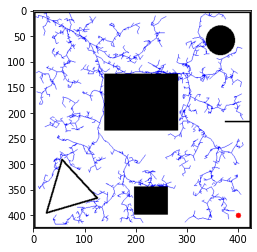

In [17]:
t1 = [[10,10]]
t2 = [[400,400]]
t1 = np.asarray(t1)
t2 = np.asarray(t2)
# img = 255*np.ones((200,200,3))
img = cv2.imread("/content/sq_maze.png")
cv2.circle(img,tuple(t2[0]), 5, (255,0,0), -1)
gra = {}
vis = {}
opt = []
temp=[]
path = rrt_nonholon(img,t1,t2)
# print(path)
plt.imshow(img)

400 400


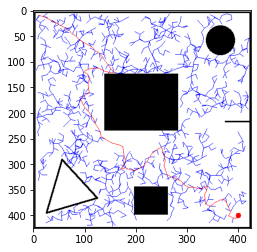

In [15]:
for x1,y1,x2,y2 in path:
    gra[tuple([x1,y1])].append(tuple([x2,y2]))
vis = np.zeros(img.shape)
__ = []
asdf = []
# dfs(tuple(t1[0]),tuple(t2[0]),tem)
tem = dfs(tuple(t1[0]),tuple(t2[0]),asdf)
# print("__",__)
tem1 = opt
# print("opt",opt)
for i in range(len(tem1) - 1):
    x1 = tem1[i][0]
    y1 = tem1[i][1]
    x2 = tem1[i + 1][0]
    y2 = tem1[i + 1][1]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0))
plt.imshow(img)
print(t2[0][0],t2[0][1])
